In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
bookings_df = pd.read_csv("../data/bookings.csv",parse_dates=["departure_datetime", "booking_date"])
bookings_df.head()

,flight_id,route,origin,destination,departure_datetime,booking_date,t,days_to_departure,day_of_week,is_weekend,...,route_type,seat_capacity,remaining_seats,price,competitor_price,search_demand_idx,bookings_made,revenue,cumulative_bookings,sold_out_flag
0,FL00001,Delhi-Mumbai,Delhi,Mumbai,2025-01-22,2024-10-24,0,90,3,False,...,business,180,172,3500.0,6797.099153,5.400000,8,28000.0,8,False
1,FL00001,Delhi-Mumbai,Delhi,Mumbai,2025-01-22,2024-10-25,1,89,4,False,...,business,180,166,3500.0,5486.015496,4.455488,6,21000.0,14,False
2,FL00001,Delhi-Mumbai,Delhi,Mumbai,2025-01-22,2024-10-26,2,88,5,True,...,business,180,157,3500.0,7231.689916,6.480000,9,31500.0,23,False
3,FL00001,Delhi-Mumbai,Delhi,Mumbai,2025-01-22,2024-10-27,3,87,6,True,...,business,180,151,3500.0,7417.050598,6.480000,6,21000.0,29,False
4,FL00001,Delhi-Mumbai,Delhi,Mumbai,2025-01-22,2024-10-28,4,86,0,False,...,business,180,148,3500.0,4597.740691,3.482050,3,10500.0,32,False


In [3]:
df = bookings_df[bookings_df["remaining_seats"] > 0].copy()

In [4]:
df = df[df["bookings_made"] >= 0]

In [5]:
df.shape

(6549, 21)

In [6]:
df['rel_price'] = df['price'] / df['competitor_price']
df["remaining_seats_ratio"] = df["remaining_seats"] / df["seat_capacity"]

feature_cols_numeric = [
    "days_to_departure",
    "remaining_seats",
    "price",
    "competitor_price",
    "rel_price",
    "day_of_week",
    "is_weekend",
] 

feature_cols_categorical = [
    "route",
    "season",
    "route_type",
]

target_col = "bookings_made"

In [7]:
# one hot encode categoricals

X_num = df[feature_cols_numeric]

X_cat = pd.get_dummies(
    df[feature_cols_categorical],
    drop_first = True
)

X = pd.concat([X_num, X_cat],axis = 1)
y = df[target_col].astype(float)

In [8]:
X.shape, y.shape

((6549, 16), (6549,))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size = 0.2,random_state=42
)

In [10]:
gbr = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gbr.fit(X_train,y_train)

,loss,'squared_error'
,learning_rate,0.05
,n_estimators,300
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [16]:
y_pred = gbr.predict(X_test)

mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

mae,rmse,r2

(1.8009571537749953, 2.3115649881932816, 0.17978114923093802)

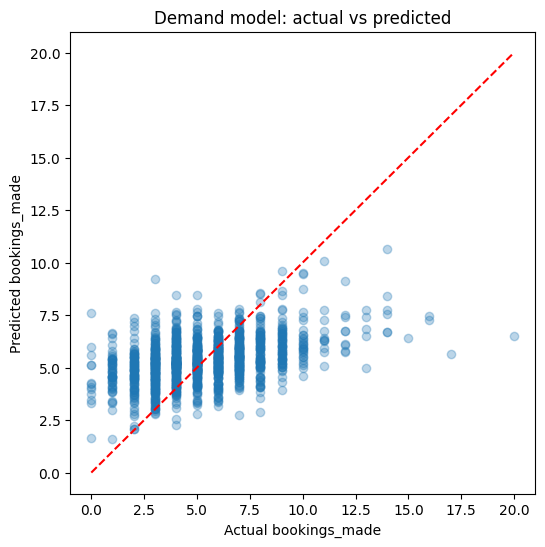

In [12]:
plt.figure(figsize=(6,6))
plt.scatter(y_test,y_pred,alpha=0.3)
plt.xlabel("Actual bookings_made")
plt.ylabel("Predicted bookings_made")
plt.title("Demand model: actual vs predicted")
plt.plot([0, max(y_test)], [0, max(y_test)], "r--")
plt.show()

In [13]:
df['bookings_made'].mean()

5.368758589097572